In [1]:
import os
import sys

import numpy as np

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec

get_ipython().magic(u'matplotlib inline')

sys.path.append('../4_analyze')
from containers import Dataset
from score_query import ScoreQuery
from utils import export, show_side_by_side, load_score_file

sys.path.append('../3_score')
from optimize import Scores

sys.path.append('../1_dock')
from parse_chembl import load_chembl

In [2]:
data = '/scratch/PI/rondror/jbelk'
dock_st = {'AR_final':'1E3G'}
#dock_st = {'B1AR':'2VT4','AR_final':'3B67','TRPV1':'3J5Q'}#1e3g 2pnu 3b68 'B2AR':'2RH1','VEGFR2':'2QU6', 'RORg':'3KYT', 
all_ligs = {p:sorted([l.split('.')[0] for l in os.listdir('{}/{}/unique_ligands'.format(data, p))#]) for p,st in dock_st.items()}
               if l != st+'_lig.mae']) for p,st in dock_st.items()}

glide_dir = 'glide12'
cross = True
ifp_dir = 'ifp/ifp13'

chembl_dir = '/scratch/PI/rondror/jbelk/CHEMBL'

In [22]:
#w = {
#    #1:2, # halogen bond
#    2:1, # hydrogen bond
#    3:1, # hydrogen bond
#    4:1, # salt bridge
#    #6:1, # pipi
#    7:0, # picat
#    8:0, # picat
#    10:0.01 # hydrophobic
#}

d = Dataset(dock_st.keys(), data, dock_st, chembl_dir)
d.load_docking(glide_dir, ifp_dir, cross)
#d.assign_weights(w)

In [ ]:
prot = 'TRPV1'
lig = '5IRX_lig'
fname1 = 'scores3/5IRX_lig/0-0-5-0.txt'
fname2 = 'scores5/5IRX_lig/5-0-5-0.txt'

In [ ]:
lig_objs = d.all_proteins['TRPV1'].docking[(glide_dir, cross)].ligands
sq1_correct = load_score_file('{}/{}/{}'.format(data, prot, fname1), lig_objs)
sq2_correct = load_score_file('{}/{}/{}'.format(data, prot, fname2), lig_objs)

In [ ]:
lig_objs = d.all_proteins['TRPV1'].docking[(glide_dir, cross)].ligands
sq1_other = load_score_file('{}/{}/{}'.format(data, prot, fname1), lig_objs)
sq2_other = load_score_file('{}/{}/{}'.format(data, prot, fname2), lig_objs)

In [ ]:
pose_ranks1 = sorted(sq1_correct.pose_scores.keys(),key=lambda x:-sq1_correct.pose_scores[x])
us_rmsd1 = sq1_correct.all_lig[lig].poses[pose_ranks1[0]].rmsd

pose_ranks2 = sorted(sq2_correct.pose_scores.keys(),key=lambda x:-sq2_correct.pose_scores[x])
us_rmsd2 = sq2_correct.all_lig[lig].poses[pose_ranks2[0]].rmsd

print us_rmsd1, us_rmsd2
print round(sq1_correct.pose_scores[pose_ranks1[0]],2), round(sq2_correct.pose_scores[pose_ranks2[0]], 2)
print sq1_correct.l_q
print sq1_correct.l_i
print sq1_correct.w
print sq1_correct.d_const
print {lig: p.rank for lig, p in sq1_correct.pose_neighbors[pose_ranks1[0]].items()}
print sq1_correct.objective(sq1_correct.pose_neighbors[pose_ranks1[0]])
print '----'
#for x, val in sorted(sq1_correct.cache.items()):
#    #if x in sq1
#    print x, val


In [ ]:
pose_ranks1 = sorted(sq1_other.pose_scores.keys(),key=lambda x:-sq1_other.pose_scores[x])
us_rmsd1 = sq1_other.all_lig[lig].poses[pose_ranks1[0]].rmsd

pose_ranks2 = sorted(sq2_other.pose_scores.keys(),key=lambda x:-sq2_other.pose_scores[x])
us_rmsd2 = sq2_other.all_lig[lig].poses[pose_ranks2[0]].rmsd

print us_rmsd1, us_rmsd2
print round(sq2_other.pose_scores[pose_ranks1[i]],2), round(sq2_other.pose_scores[pose_ranks2[i]], 2)

TRPV1 5IRX_lig 6 1 0
-0.00230775253729
TRPV1 5IRX_lig 15 1 0
0.115479463786
TRPV1 5IRX_lig 19 0 1
0.0521711090597


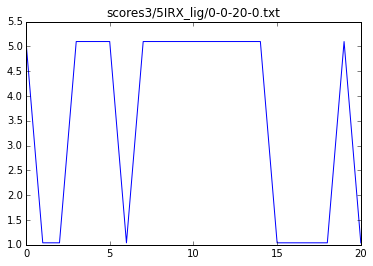

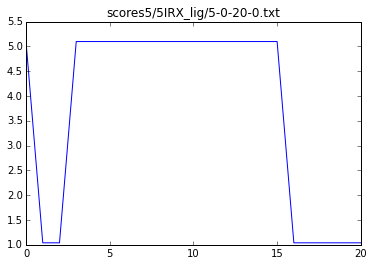

In [8]:
max_n_lig = 20
#d.assign_weights({2:1,3:1,4:1})#,10:0.01})
all_rmsd1 = {}
all_rmsd2 = {}
for n in range(max_n_lig + 1):
    all_rmsd1[n] = []
    all_rmsd2[n] = []
    for prot, st in dock_st.items():
        lig_objs = d.all_proteins[prot].docking[(glide_dir, cross)].ligands
        for l in all_ligs[prot]:
            if l != '5IRX_lig':continue
                
            #fname1 = 'scores4/{}/5-0-{}-1.txt'.format(l, n)
            fname1 = 'scores3/{}/0-0-{}-0.txt'.format(l, n)
            fpath1 = '{}/{}/{}'.format(data, prot, fname1)

            sq1 = load_score_file(fpath1, lig_objs)
            pose_ranks1 = sorted(sq1.pose_scores.keys(),key=lambda x:-sq1.pose_scores[x])
            us_rmsd1 = sq1.all_lig[l].poses[pose_ranks1[0]].rmsd
            all_rmsd1[n].append(us_rmsd1)

            #print fname1, pose_ranks1[0]
            #print round(sq1.pose_scores[0],2), round(sq1.pose_scores[1],2)

            fname2 = 'scores5/{}/5-0-{}-0.txt'.format(l, n)
            fpath2 = '{}/{}/{}'.format(data, prot, fname2)

            sq2 = load_score_file(fpath2, lig_objs)
            pose_ranks2 = sorted(sq2.pose_scores.keys(),key=lambda x:-sq2.pose_scores[x])
            us_rmsd2 = sq2.all_lig[l].poses[pose_ranks2[0]].rmsd
            all_rmsd2[n].append(us_rmsd2)

            for i in sq1.w:
                assert sq1.w[i] == sq2.w.get(i,0), i
            #assert sq1.w == sq2.w
            assert sq1.d_const == sq2.d_const
            assert sq1.l_q == sq2.l_q
            
            #if n == 5:
            #    #for i in range(25):
            #    print 0, pose_ranks1[0], pose_ranks2[0]
            #    print round(sq1.pose_scores[pose_ranks1[0]],2), round(sq2.pose_scores[pose_ranks2[0]], 2)
            #    print sq1.l_q
            #    print sq1.l_i
            #    print sq1.w
            #    print sq1.d_const
            #    print {lig: p.rank for lig, p in sq1.pose_neighbors[pose_ranks1[0]].items()}
            #    print sq1.objective(sq1.pose_neighbors[pose_ranks1[0]])
            #print fname2, pose_ranks2[0]
            #print round(sq2.pose_scores[0],2), round(sq2.pose_scores[1],2)

            if pose_ranks1[0] != pose_ranks2[0]:
                print prot, l, n, pose_ranks1[0], pose_ranks2[0]
                print sq1.pose_scores[pose_ranks1[0]] - sq2.pose_scores[pose_ranks2[0]]
                
plt.plot(range(max_n_lig + 1), [np.mean(all_rmsd1[n]) for n in range(max_n_lig + 1)])
plt.title(fname1)
plt.show()
plt.plot(range(max_n_lig + 1), [np.mean(all_rmsd2[n]) for n in range(max_n_lig + 1)])
plt.title(fname2)
plt.show()

In [12]:
for var in dir():
    print var#, eval(var)

Dataset
In
Out
ScoreQuery
Scores
_
__
___
__builtin__
__builtins__
__doc__
__name__
__package__
_dh
_i
_i1
_i10
_i11
_i12
_i2
_i3
_i4
_i5
_i6
_i7
_i8
_i9
_ih
_ii
_iii
_oh
_sh
all_ligs
all_rmsd1
all_rmsd2
chembl_dir
cm
cross
d
data
dock_st
exit
export
fname1
fname2
fpath1
fpath2
get_ipython
glide_dir
gridspec
i
ifp_dir
l
lig_objs
load_chembl
load_score_file
matplotlib
max_n_lig
n
np
os
plt
pose_ranks1
pose_ranks2
prot
quit
show_side_by_side
sq1
sq2
st
sys
us_rmsd1
us_rmsd2
var


In [ ]:
print sq1.w

In [ ]:
#out_dir='scores3'
#all_lam = [i/10.0 for i in range(1,11)]
#all_w10 = [i/100.0 for i in range(6)]
#all_n = [i for i in range(21)]
#all_w56 = [(0,0),(0,1),(1,0)]

out_dir='scores5'
all_lam = [i/100.0 for i in range(5,16)]
all_w10 = [i/200.0 for i in range(4)]
all_n = [i for i in range(26)]
all_w56 = [(0,0),(0,1),(1,0)]

for x in enumerate(all_lam):
    if x[0] != 5: continue
    #if x[0] < 2: continue
    for y in enumerate(all_w10):
        if y[0] != 1: continue
        for m in enumerate(all_w56):
            if m[0] != 0: continue
            #w[10] = all_w10[y[0]]
            #w[5] = all_w56[m[0]][0]
            #w[6] = all_w56[m[0]][1]

            #d.assign_weights(w)

            all_rmsd = {}
            for z in enumerate(all_n):
                all_rmsd[z[0]] = []
                f_name = '{}-{}-{}-{}.txt'.format(x[0], y[0], z[0], m[0])
                for prot, st in dock_st.items():
                    lig_objs = d.all_proteins[prot].docking[(glide_dir, cross)].ligands
                    for l in all_ligs[prot]:
                        try:
                            f_path = '{}/{}/{}/{}/{}'.format(data, prot, out_dir, l, f_name)
                            sq = load_score_file(f_path, lig_objs)
                            pose_ranks = sorted(sq.pose_scores.keys(),key=lambda x:-sq.pose_scores[x])
                            us_rmsd = sq.all_lig[l].poses[pose_ranks[0]].rmsd
                            all_rmsd[z[0]].append(us_rmsd)
                        except:
                            print f_path
            #print w, sq.w
            plt.plot(all_n, [np.mean(all_rmsd[n]) for n in all_n])
            plt.title(f_name)
            plt.show()

In [ ]:
all_rmsds = {}
d_const=[0.1]#,1.0]
for prot, st in dock_st.items():
    #if prot != 'AR_final': continue
    for l in all_ligs[prot]:
        for di in d_const:
            all_rmsds[(l,di)] = []
            for nl in [10]:#range(21):
                sq = loaded[prot][l][(di, 'ifp/ifp13',nl)]
                pose_ranks = sorted(sq.pose_scores.keys(),key=lambda x:-sq.pose_scores[x])
                pose_rmsds = [sq.all_lig[l].poses[p].rmsd for p in pose_ranks]
                top_5_rmsd = min(pose_rmsds[:5])
                all_rmsds[(l,di)].append(top_5_rmsd)
            #try:
            #    max_i = max([j[2] for j in loaded[prot][l]]+[-1])+1
            #    sq_list = [loaded[prot][l][(di, 'ifp/ifp13',i)] for i in range(max_i)]
            #    top_poses = [sorted(sq.pose_scores.keys(),key=lambda x:-sq.pose_scores[x])[0] for sq in sq_list]
                #for p in set(top_poses):
                #    plt.plot(range(21), [sq.pose_scores[p] for sq in sq_list], label=p)
                #plt.legend()
                #plt.show()
            #    all_rmsds[(l,di)] = [sq.all_lig[l].poses[top_poses[i]].rmsd for i,sq in enumerate(sq_list)]
            plt.plot(range(21), all_rmsds[(l,di)])
            plt.title(l)
            plt.show()
            #except Exception() as e:
            #    print e
            #    pass
            
for di in d_const:
    plt.plot(range(21), [np.mean([all_rmsds[(l,dj)][i] for l,dj in all_rmsds if di == dj]) for i in range(21)], label=di)
plt.legend()
plt.xlabel('number of ligands')
plt.ylabel('average rmsd')
plt.show()

In [ ]:
sq = loaded['TRPV1']['5IRX_lig'][(0.5, 'ifp/ifp13', 20)]
top_pose = sorted(sq.pose_scores.keys(), key=lambda x:-sq.pose_scores[x])[0]
best_pose = sorted(sq.pose_scores.keys(), key=lambda x:sq.all_lig[sq.l_q].poses[x].rmsd)[0]
print top_pose, best_pose
print sq.all_lig[sq.l_q].poses[top_pose].rmsd, sq.all_lig[sq.l_q].poses[best_pose].rmsd
print sq.objective(sq.pose_neighbors[top_pose]), sq.objective(sq.pose_neighbors[best_pose])
show_side_by_side(sq.pose_neighbors[top_pose], sq.pose_neighbors[best_pose], [sq.l_q]+sq.l_i)

In [ ]:
prot = 'AR_final'
for l in all_ligs[prot]:
    st = l.split('_')[0]
    eval_ligs = [lig for lig in all_ligs[prot] if lig != l]
    d = Dataset([prot], data, {prot:st}, chembl_dir)
    d.load_docking(glide_dir, ifp_dir, cross)
    rmsds = d.glide_perf((glide_dir,True), [prot], ligands=eval_ligs, show=True, 
                         title='{}, {}, {}'.format(prot, glide_dir, st), n_list=[1,5,25,100])
    #print 'docked:', len(rmsds[0])
    #print np.mean(rmsds[0])
    print 'top-1: {}, top-100: {}'.format(len([i for i in rmsds[0] if i <=2 and i is not None]), 
                                          len([i for i in rmsds[-1] if i <=2 and i is not None]))

#for l, lig in sorted(d.all_proteins[prot].docking[(glide_dir, cross)].ligands.items()):
#    print l, lig.poses[0].rmsd

In [ ]:
# view docking output

## fix this!

for prot, st in dock_st.items():
    if prot != 'RORg': continue
    loaded_ligs = d.all_proteins[prot].docking[(glide_dir, cross)].ligands
    d.all_proteins[prot].docking[(glide_dir, cross)].ligands = {li:lig for li, lig in loaded_ligs.items() 
                                                                if li in all_ligs[prot]}
    
    rmsds = d.glide_perf((glide_dir,True), [prot], title='{}, {}, {}'.format(prot, glide_dir, st),n_list=[1,5,25,100])
    print st, 'docked:', len(rmsds[0])
    print np.mean(rmsds[0])
    print 'top-1: {}, top-100: {}'.format(len([i for i in rmsds[0] if i <=2]), len([i for i in rmsds[-1] if i <=2]))
    
    for l, lig in sorted(d.all_proteins[prot].docking[(glide_dir, cross)].ligands.items()):
        print l, lig.poses[0].rmsd

In [ ]:
o_dir = '/scratch/PI/rondror/jbelk'
c_dir = '/scratch/PI/rondror/jbelk/CHEMBL'

chembl_ligs = {}

for prot, st in dock_st.items():
    chembl_ligs[prot] = {}
    chembl = {'{}_lig'.format(c.chembl_id):c for smi, c in load_chembl(o_dir, prot, c_dir, load_st=False).items()}
    for dock in os.listdir('{}/{}/{}'.format(data, prot, glide_dir)):
        l, s = dock.split('-to-')
        if l[:6] != 'CHEMBL': continue
        if s != st: continue
        if os.path.exists('{}/{}/{}/{}/{}_pv.maegz'.format(data, prot, glide_dir, dock, dock)):
            chembl_ligs[prot][l] = chembl[l]
            
#print len(chembl_ligs)
#for p, c in chembl_ligs.items():
#    print [(a[0],a[1].ki) for a in c.items()[:5]]

In [23]:
score_cache = {}

In [24]:
all_helper_ligs = {}

In [33]:
#prot = 'AR_final'
#lig = '2AM9_lig'
num_ligs = 1
data_const = 0.1
num_poses = 25

w = {2:1,3:1,4:1}
d.assign_weights(w)
rmsds = {}

for num_ligs in [5]:#range(5):
    print num_ligs

    for prot, st in dock_st.items():
        #st = '3B67'
        #if prot != 'TRPV1': continue
        lig_objs = d.all_proteins[prot].docking[(glide_dir, cross)].ligands
        
        if prot not in all_helper_ligs:
            all_helper_ligs[prot] = [l for l in lig_objs if l[:6] == 'CHEMBL']
            all_helper_ligs[prot].sort(key = lambda x: lig_objs[x].ki)

        #for l in all_helper_ligs[prot][:5]:
        #    print l
        #    print os.path.exists('/scratch/PI/rondror/jbelk/AR_final/glide12/{}-to-1E3G/{}-to-1E3G_pv.maegz'.format(l, l))
        #    print os.path.exists('/scratch/PI/rondror/jbelk/AR_final/ifp/ifp13/{}-to-1E3G.fp'.format(l))
        #    print lig_objs[l].poses[0].fp.keys()
        #    print lig_objs[l].poses[0].rmsd
        #break
            
        us_ave_rmsd = 0
        glide_ave_rmsd = 0
        for q in sorted(all_ligs[prot]):
            if q not in rmsds:
                rmsds[q] = {}
            #if num_ligs not in rmsds[q]:
            #    rmsds[q]
            try:
                sq = ScoreQuery(q, all_helper_ligs[prot][:num_ligs], lig_objs, data_const, num_poses, w)
                sq.score_all()

                show_side_by_side(sq.pose_neighbors[0], sq.pose_neighbors[1], [q]+all_helper_ligs[prot][:num_ligs])#, 
                      #t1='Top Pose: {}'.format(us_top), t2='Best Pose: {}'.format(best_pose), num_i=15)

                us_pose_ranking = sorted(sq.pose_scores.keys(), key=lambda x: -1*sq.pose_scores[x])
                us_top = lig_objs[q].poses[us_pose_ranking[0]]
                glide_top = lig_objs[q].poses[0]
                print '{} -- our rmsd: {} glide rmsd: {}'.format(q, round(us_top.rmsd,2), round(glide_top.rmsd,2))
                us_ave_rmsd += us_top.rmsd/float(len(all_ligs[prot]))
                glide_ave_rmsd += glide_top.rmsd/float(len(all_ligs[prot]))

                rmsds[q][num_ligs] = us_top.rmsd
            except:
                #print e
                print q, 'not docked'
        print '{} average -- us: {} glide: {}'.format(prot, round(us_ave_rmsd,2), round(glide_ave_rmsd,2))
        print '-----------'
    print 'rmsd:', np.mean([rmsds[l][num_ligs] for l in rmsds])


5


RuntimeError: Width and height must have positive values

1T5Z_lig -- our rmsd: 0.73 glide rmsd: 0.73


RuntimeError: Width and height must have positive values

2AM9_lig -- our rmsd: 0.96 glide rmsd: 0.96


RuntimeError: Width and height must have positive values

2AMB_lig -- our rmsd: 0.75 glide rmsd: 0.75
2AX9_lig not docked
2AXA_lig not docked


RuntimeError: Width and height must have positive values

2HVC_lig -- our rmsd: 5.98 glide rmsd: 5.98


RuntimeError: Width and height must have positive values

2IHQ_lig -- our rmsd: 0.64 glide rmsd: 0.64


RuntimeError: Width and height must have positive values

2NW4_lig -- our rmsd: 0.84 glide rmsd: 0.84
2PNU_lig not docked
3B5R_lig not docked
3B65_lig not docked
3B66_lig not docked
3B67_lig not docked
3B68_lig not docked


RuntimeError: Width and height must have positive values

3G0W_lig -- our rmsd: 2.71 glide rmsd: 2.71
3RLJ_lig not docked
3V49_lig not docked
3V4A_lig not docked


RuntimeError: Width and height must have positive values

4QL8_lig -- our rmsd: 0.75 glide rmsd: 0.75


RuntimeError: Width and height must have positive values

5CJ6_lig -- our rmsd: 2.89 glide rmsd: 2.89


RuntimeError: Width and height must have positive values

5T8E_lig -- our rmsd: 0.44 glide rmsd: 0.44


RuntimeError: Width and height must have positive values

5T8J_lig -- our rmsd: 1.98 glide rmsd: 1.98


RuntimeError: Width and height must have positive values

5V8Q_lig -- our rmsd: 0.72 glide rmsd: 0.72
AR_final average -- us: 0.84 glide: 0.84
-----------
rmsd:

KeyError: 5

In [ ]:
show_side_by_side(top_cluster, best_cluster, [q]+affinity_sort[:num_ligs], 
                  t1='Top Pose: {}'.format(us_top), t2='Best Pose: {}'.format(best_pose), num_i=15)

In [ ]:
yvals = []
for num_ligs in range(8):
    yvals.append(np.mean([rmsds[l][num_ligs] for l in rmsds]))
    
plt.plot(range(8), yvals, '.-')
plt.show()

In [ ]:
num_poses = 25
scores_cache = {prot:{} for prot in dock_st}

#for prot, st in dock_st.items():
#    print prot
#    lig_objs = d.all_proteins[prot].docking[(glide_dir, cross)].ligands
#    for q in sorted(all_ligs[prot]):
#        #print q
#        for h in chembl_ligs[prot]:
#            scores_cache[prot][(q,h)] = ScorePair(lig_objs[q], lig_objs[h], 
#                                                          '{}/{}/{}'.format(data, prot, glide_dir), st, n=num_poses)

In [ ]:
us_rmsds = {prot:{} for prot in dock_st}
glide_rmsds = {prot:{} for prot in dock_st}

# = []
#score_of_pose_2 = []
#score_of_pose_3 = []
#score_of_pose_9 = []

for prot, st in dock_st.items():
    print prot
    #if prot != 'AR_final':continue
    lig_objs = d.all_proteins[prot].docking[(glide_dir, cross)].ligands
    affinity_sort = sorted(chembl_ligs[prot].keys(), key=lambda x:chembl_ligs[prot][x].ki)
    
    #num_ligs = 5
    data_const = 8
    #for data_const in range(20):
    for q in sorted(all_ligs[prot]):
        if q != '5CJ6_lig': continue#not in ['3V4A_lig','3V49_lig']: continue
        all_top = []
        
        chosen_poses = list(range(num_poses))
        scores_of_chosen_poses = {p:[] for p in chosen_poses}
        for num_ligs in [17]:#range(20):
        #print affinity_sort[:num_ligs]
            #if q != '2Y04_lig':continue
            if num_ligs not in us_rmsds[prot]:
                us_rmsds[prot][num_ligs] = {}
                glide_rmsds[prot][num_ligs] = {}
                
            if data_const not in us_rmsds[prot][num_ligs]:
                us_rmsds[prot][num_ligs][data_const] = []
                glide_rmsds[prot][num_ligs][data_const] = []
                
            votes = {}
            scores = {}
            
            best_ligs = [hi for (qi,hi) in scores_cache[prot] if qi == q]
            best_ligs.sort(key=lambda x:-np.max(scores_cache[prot][(q,x)].all_pose_scores))
            #print q, [np.max(scores_cache[prot][x].pab[data_const]) for x in best_ligs[:5]]
            
            new_pose_scores = np.zeros(min(num_poses, len(lig_objs[q].poses)))
            for h in affinity_sort[:num_ligs]:

                lig_objs = d.all_proteins[prot].docking[(glide_dir, cross)].ligands
                #for q in sorted(all_ligs[prot]):
                    #print q
                #    for h in chembl_ligs[prot]:
                if (q,h) not in scores_cache[prot]:
                    scores_cache[prot][(q,h)] = ScorePair(lig_objs[q], lig_objs[h], 
                                                          '{}/{}/{}'.format(data, prot, glide_dir), st, n=num_poses)
                
                s, v = scores_cache[prot][(q,h)].get_query_scores(data_const=data_const)#03)#.001)
                new_pose_scores += s/(8*num_ligs)
                votes[h] = [int(i) for i in v]
                scores[h] = s
                
            if num_ligs == 0:
                new_pose_scores = [-1*p.gscore for p in lig_objs[q].poses[:num_poses]]

            #new_pose_scores = new_pose_scores/(2*num_ligs)
            
            for p in range(len(new_pose_scores)):
                scores_of_chosen_poses[p].append(new_pose_scores[p])
            
            us_top = np.argmax(new_pose_scores)
            all_top.append(us_top)
            all_top.append(np.argmax([sc if i!= us_top else 0 for i, sc in enumerate(new_pose_scores)]))
            best_pose = 6 #np.argmin([p.rmsd for p in lig_objs[q].poses[:num_poses]])
            
            top_cluster = {q:lig_objs[q].poses[us_top]}
            best_cluster = {q:lig_objs[q].poses[best_pose]}
            for h in votes:
                top_cluster[h] = lig_objs[h].poses[votes[h][us_top]]
                best_cluster[h] = lig_objs[h].poses[votes[h][best_pose]]
                
            glide_rmsd = lig_objs[q].poses[0].rmsd
            us_rmsd = lig_objs[q].poses[us_top].rmsd
            
            #if us_rmsd > 2:# != prev_top:
            #    prev_top = us_top
            print num_ligs, q, glide_rmsd
            print us_top, us_rmsd, new_pose_scores[us_top], best_pose, lig_objs[q].poses[best_pose].rmsd, new_pose_scores[best_pose]
            show_side_by_side(top_cluster, best_cluster, [q]+affinity_sort[:num_ligs], 
                              t1='Top Pose: {}'.format(us_top), t2='Best Pose: {}'.format(best_pose), num_i=15)
            
            export(top_cluster, '{}-{}'.format(q,num_ligs), prot, struct=st, verbose=True)
            
            for h in affinity_sort[:num_ligs]:
                v = votes[h]
                print int(v[us_top]), round(scores[h][us_top],2), h        
                print int(v[best_pose]), round(scores[h][best_pose],2), h          
            print '-------'
            us_rmsds[prot][num_ligs][data_const].append(us_rmsd)
            glide_rmsds[prot][num_ligs][data_const].append(glide_rmsd)
        #print num_ligs, str(np.mean(us_rmsds[prot][num_ligs]))[:5], str(np.mean(
        #    glide_rmsds[prot][num_ligs]))[:5], len(
        #    [i for i in us_rmsds[prot][num_ligs] if i <= 2]), len([i for i in glide_rmsds[prot][num_ligs] if i <= 2])

        #for p in set(all_top):
        #    plt.plot(range(1,20),scores_of_chosen_poses[p][1:], label='pose {}, rmsd={}'.format(p, round(lig_objs[q].poses[p].rmsd,2)))
        #plt.legend()
        
        #plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
        #plt.title(q)
        #plt.xlabel('# ligands')
        #plt.ylabel('pose score')
        #plt.show()

In [ ]:
perf = []
max_lig = 20
#d=8
for n in range(max_lig):
    r = []
    for p in us_rmsds:
        r.extend(us_rmsds[p][n][data_const])
    perf.append(np.mean(r))
    print n, len([i for i in r if i <= 2])

fig = plt.figure(figsize=(6,6))
plt.rc('font', weight='normal')

plt.plot(range(max_lig), perf, '.-', markersize=10)

#plt.plot([0,12],[0,12],'k')
#plt.plot(us_rmsds, glide_rmsds, '.', markersize=10)
plt.axis([-0.5, max_lig+0.5, 1.2, 2.5])

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

#fig = plt.figure(figsize=(4, 5), dpi=100)


#ax.set_aspect(51.0/3.0)
plt.xlabel('Number of Ligands', size=20)
plt.ylabel('Performance [Average RMSD, $\AA$]', size=20)

plt.tick_params(axis='both', which='major', labelsize=20)
#plt.title('Adrenaline Receptor ($\\beta_1$AR) Performance', size=24)
#plt.show()

plt.show()

In [ ]:
perf = []
max_d = 20
num_ligs = 5
for d_val in range(max_d):
    r = []
    for p in us_rmsds:
        r.extend(us_rmsds[p][num_ligs][d_val])
    perf.append(np.mean(r))

fig = plt.figure(figsize=(6,6))
plt.rc('font', weight='normal')

plt.plot(range(max_d), perf, '.-', markersize=10)

#plt.plot([0,12],[0,12],'k')
#plt.plot(us_rmsds, glide_rmsds, '.', markersize=10)
plt.axis([-0.5, max_d+0.5, 0, 3])

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])

#fig = plt.figure(figsize=(4, 5), dpi=100)


ax.set_aspect(7)
plt.xlabel('Pair Weight', size=20)
plt.ylabel('Performance [Average RMSD, $\AA$]', size=20)

plt.tick_params(axis='both', which='major', labelsize=20)
#plt.title('Adrenaline Receptor ($\\beta_1$AR) Performance', size=24)
#plt.show()

plt.show()

In [ ]:
test_pair = ScorePair(lig_objs['2Y00_lig'], 
                      lig_objs[chembl_ligs[42]], 
                      '{}/{}/{}'.format(data, prot, glide_dir), first[prot])

In [ ]:
print test_pair.all_pose_scores
print test_pair.all_mcss_rmsds
print test_pair.get_query_scores(0)
print test_pair.get_query_scores(1)
print test_pair.m_size, test_pair.q_size, test_pair.h_size

In [ ]:
#query = '2VT4_lig'

g = 1.5
n = 100
results = {l:[] for l in query_ligs}

top_poses = {}

max_ligs = 10

for num_ligs in range(max_ligs):
    top_poses[num_ligs] = {}
    #print num_ligs
    helper_ligs = chembl_ligs[:num_ligs]
    print num_ligs, helper_ligs
    for query in sorted(query_ligs):

        all_ligs = [query] + helper_ligs
        score_input = {l:d.all_proteins[prot].docking[(glide_dir, cross)].ligands[l].poses for l in all_ligs}
        scores = Scores(score_input, all_ligs, n, {}, gscore_weight=g)

        final_rmsd = scores.optimized_scores[query].rmsd
        #if query == '2Y00_lig': final_rmsd = 2
        results[query].append(final_rmsd)
        top_poses[num_ligs][query] = scores.optimized_scores[query]
        if final_rmsd > 5:#2:
            print query, final_rmsd
            for l in all_ligs:
                print l, scores.optimized_scores[l].rank
    print 'result:', np.mean([r[num_ligs] for l, r in results.items()])

In [ ]:
for n in range(max_ligs):
    print n, np.mean([r[n] for l, r in results.items()])

for l, r_list in results.items():
    #print l, r_list
    plt.plot(r_list)
plt.show()

In [ ]:
show_side_by_side(top_poses[1], top_poses[0], sorted(query_ligs), t1='Us top', t2='Glide top', num_i=15)

In [ ]:
for l in sorted([l.split('.')[0] for l in os.listdir('{}/AR/unique_ligands'.format(data))]):
    #if l == '2OZ7_lig':continue
    print l, d.all_proteins['AR'].docking[compare[0]].ligands[l].poses[0].rmsd

In [ ]:
print rmsds[0]
print rmsds[-1]

In [ ]:

#for u in uniprots:#g in glide:
    #print g#.split('/')[-1]
#for g in compare:
#g = compare[0]
for g in compare:
    for p in prots:
        rmsds = d.glide_perf(g, [p], title='{} {}'.format(p,g[0]))#, title='{}, SP, {} ligs'.format(u, num_l(u)))
        #r2 = d.glide_perf(('glide_if', True), [u], title='{}, IF, {} ligs'.format(u, num_l(u)))
        #for rmsds in [r1, r2]:
        print len([1 for i in rmsds[0] if i != 100]), len(rmsds[0])
        print 'top-1', float(sum([1 for i in rmsds[0] if i <= 2]))/float(len(rmsds[0]))
        print 'top-100', float(sum([1 for i in rmsds[-1] if i <= 2]))/float(len(rmsds[-1]))

In [ ]:
print uniprots

In [ ]:
#data = '/scratch/PI/rondror/jbelk/pdbbind_refined'

first = {}
with open('/scratch/PI/rondror/jbelk/pdbbind_first.txt') as f:
    for line in f:
        k = 'pdbbind_refined/{}'.format(line.split()[0])
        first[k] = line.split()[1]
prots = sorted([u for u in first.keys() if num_l(u) >=15],
               key=lambda x: -num_l(x))
#glide = ['glide{}'.format(i) for i in [3,9,11]] + ['glide_if']